In [1]:
import pyBigWig
import numpy as np
import matplotlib.pyplot as plt


b = np.array([bw.stats('1',i,i+10000,'mean') for i in range(0,bw.chroms('1')-10000,10000)]).flatten()

(_,*_) = plt.hist(b,color='b',range=(0,50),bins=201,histtype='step',cumulative=-1,density=True)


NameError: name 'bw' is not defined

In [30]:
(np.percentile(b,75)-np.percentile(b,25))/(np.percentile(b,75)+np.percentile(b,25))

bw.stats('1',type='std',exact=True)

In [4]:
bw30 = pyBigWig.open("cov.bw")
bw40 = pyBigWig.open("cov40.bw")
bw60 = pyBigWig.open("cov60.bw")
bw70 = pyBigWig.open("cov2.bw")

In [5]:
import scipy.stats as ss
import pandas as pd
def make_coverage_df(bw):
    chromosomes = [str(i) for i in range(1,30)] + ['X','Y']
    rows = []
    for chrom,length in bw.chroms().items():
        covs = np.array([bw.stats(chrom,i,i+10000,'mean') for i in range(0,length-10000,10000)]).flatten()
        mean = bw.stats(chrom,type='mean',exact=True)[0]
        std = bw.stats(chrom,type='std',exact=True)[0]
        if mean is None or std is None:
            continue
        
        rows.append({'name':chrom,'chr':chrom in chromosomes,'mean':mean,'std':std,'cov':std/mean,'sub1':sum(covs<1),'substd':sum(covs<(mean-std))})
    return pd.DataFrame(rows)

In [6]:
df = make_coverage_df(bw30)
df2= make_coverage_df(bw40)
df3 = make_coverage_df(bw60)
df4 = make_coverage_df(bw70)
df['sample']=30
df2['sample']=40
df3['sample']=60
df4['sample']=70
dfx = pd.concat([df,df2,df3,df4])

In [7]:
import seaborn as sns


/opt/miniconda3/envs/yeet/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


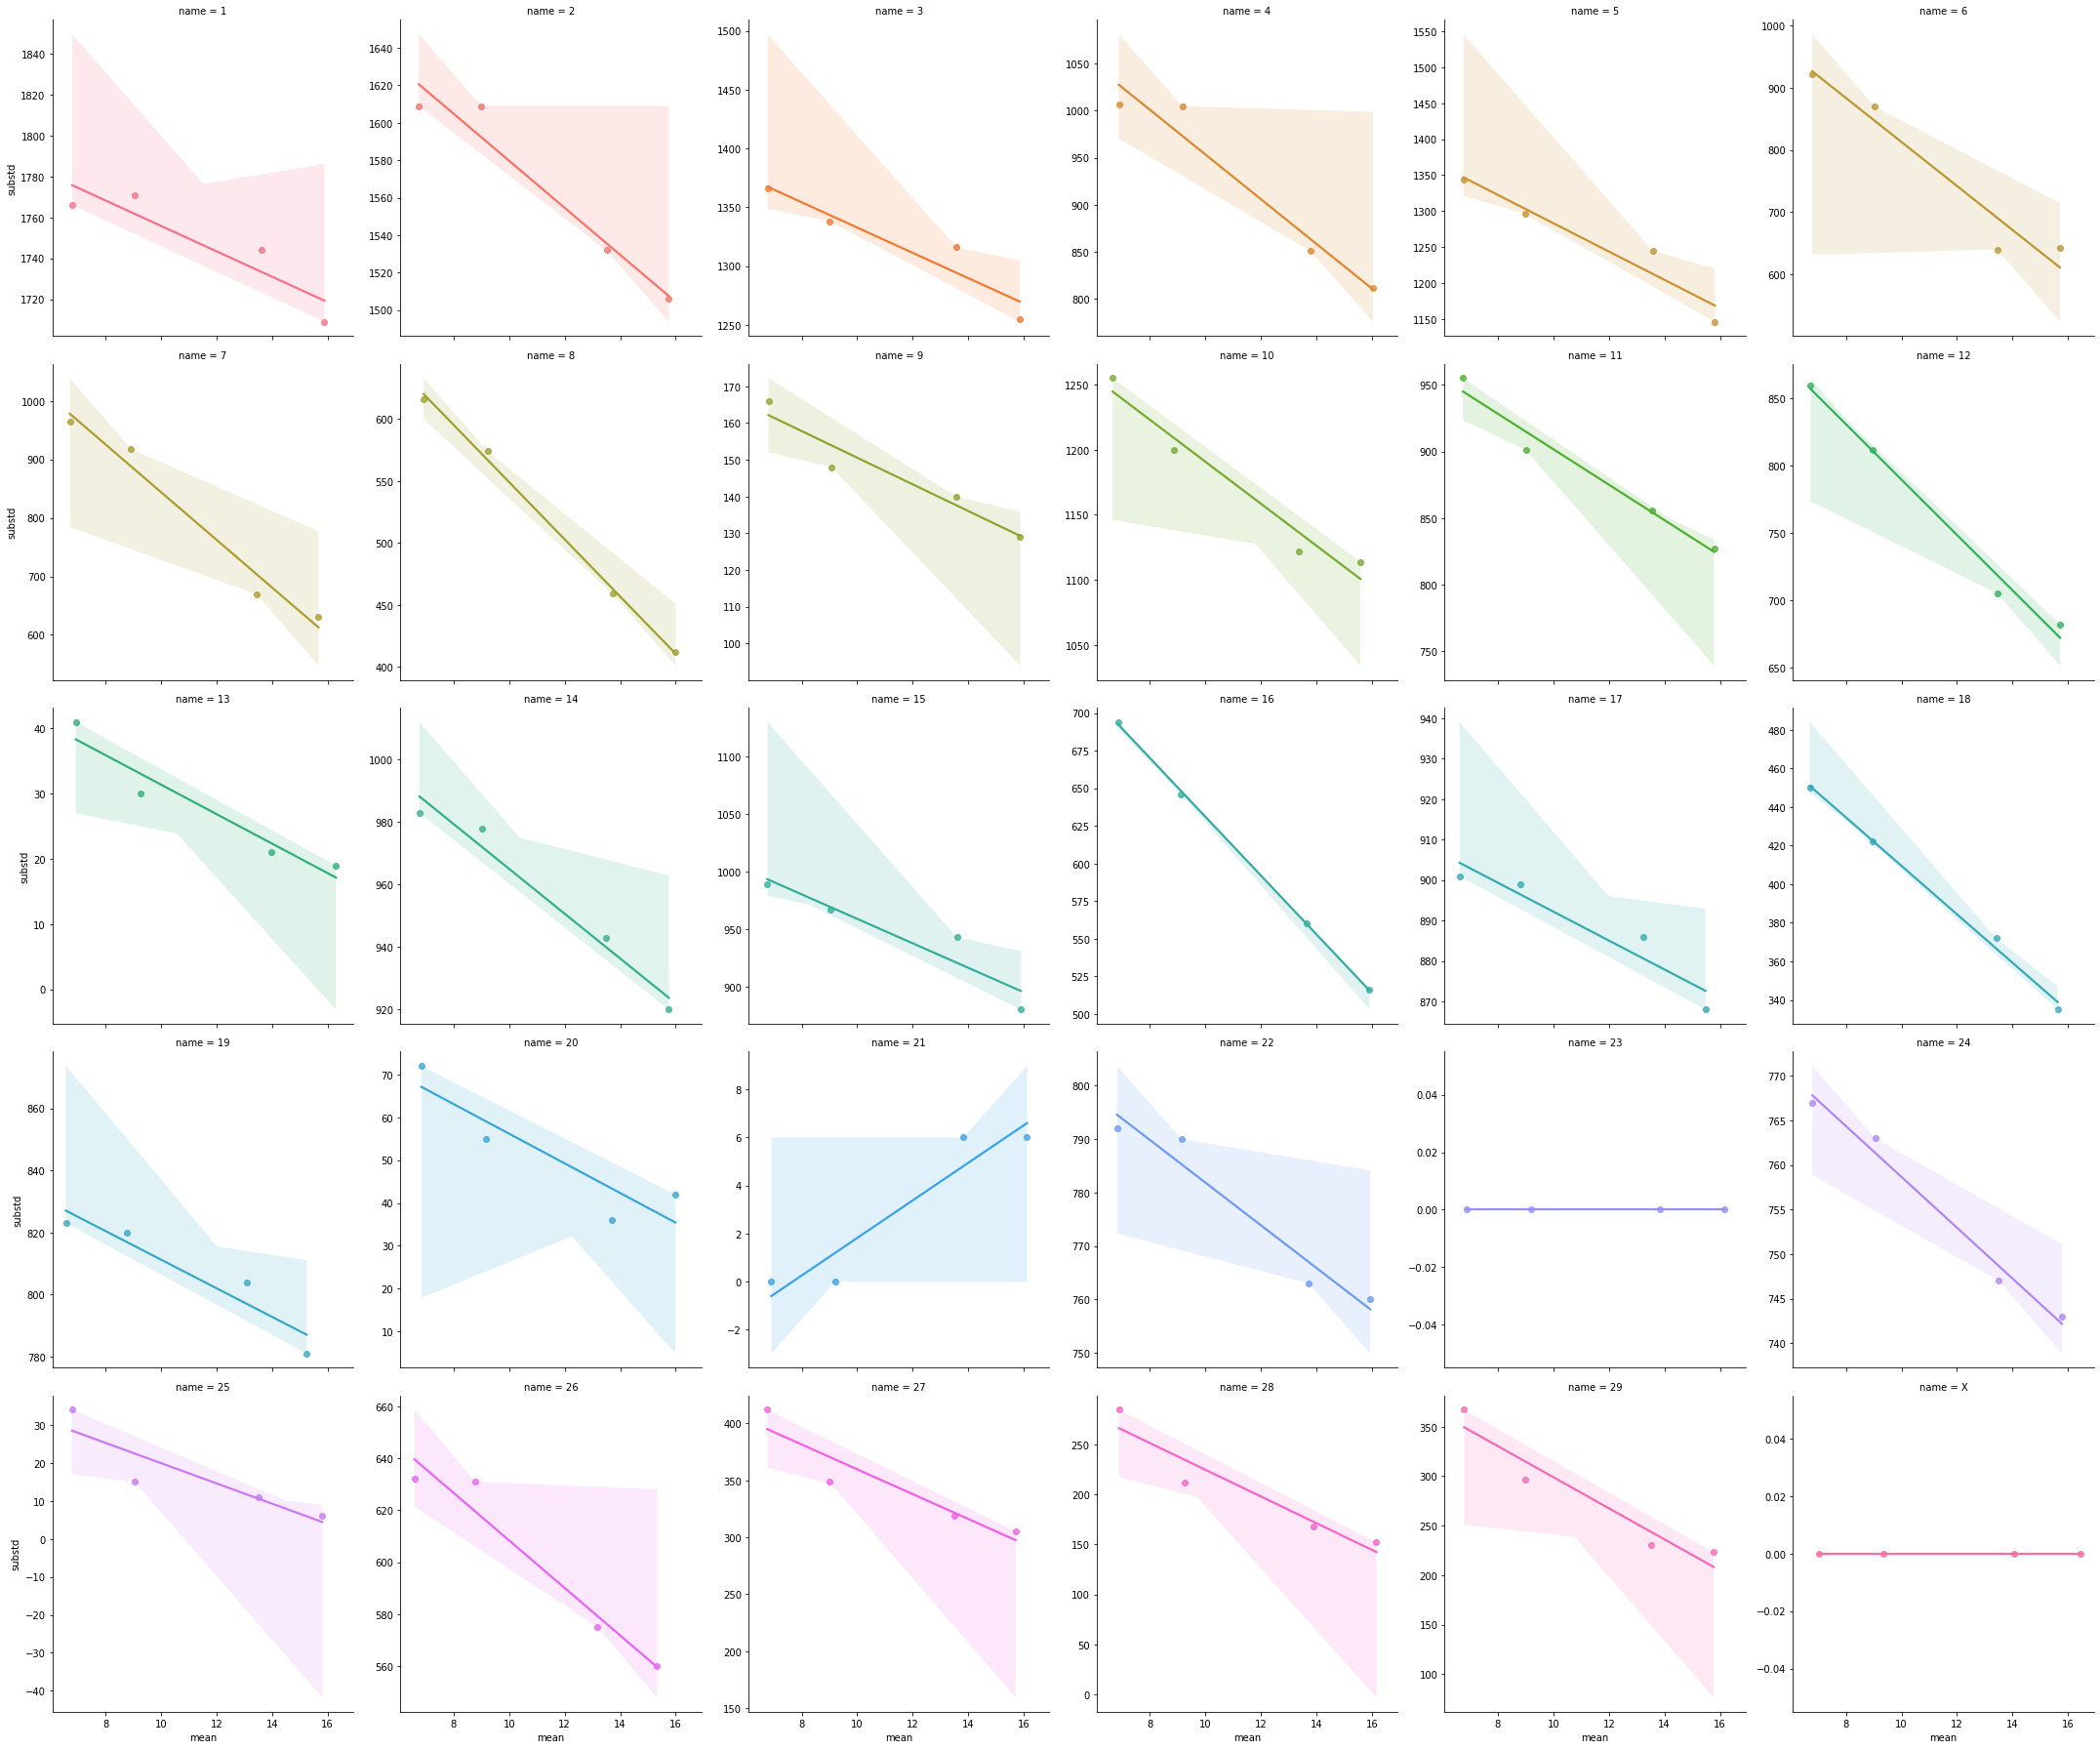

In [8]:
dfq = dfx[(dfx['chr']==True)&(dfx['name']!='Y')]
sns.lmplot(data=dfq,x='mean',y='substd',hue='name',col='name',col_wrap=6,sharey=False)
plt.show()

In [13]:
dfq.corr()

,chr,mean,std,cov,sub1,substd,sample
chr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.000000,0.467224,-0.101381,-0.239259,-0.107090,0.998640
std,NaN,0.467224,1.000000,0.793696,0.232304,-0.645720,0.436798
cov,NaN,-0.101381,0.793696,1.000000,0.447124,-0.711343,-0.133466
sub1,NaN,-0.239259,0.232304,0.447124,1.000000,-0.052778,-0.250110
substd,NaN,-0.107090,-0.645720,-0.711343,-0.052778,1.000000,-0.086265
sample,NaN,0.998640,0.436798,-0.133466,-0.250110,-0.086265,1.000000


In [16]:
dfq.groupby('sample')[['mean','cov','sub1','substd']].mean()


,mean,cov,sub1,substd
sample,,,,
30,6.788877,0.583755,66.900000,702.400000
40,9.048001,0.547360,41.000000,677.166667
60,13.578189,0.508033,30.033333,622.100000
70,15.834748,0.495760,27.666667,599.400000


In [15]:
print(ss.pearsonr(dfq['sample'],dfq['sub1']))
print(ss.pearsonr(dfq['sample'],dfq['substd']))
print(ss.pearsonr(dfq['sample'],dfq['cov']))

(-0.2501096697756348, 0.00586801511871953)
(-0.08626476362898293, 0.3488409056134606)
(-0.13346625133840553, 0.14615252240765697)


In [17]:
67/30

2.2333333333333334

In [21]:
dfq[dfq['sub1']>100]

,name,chr,mean,std,cov,sub1,substd,sample
8,9,True,6.807251,5.517746,0.810569,135,166,30
9,10,True,6.663419,3.019911,0.453207,196,1255,30
29,X,True,7.025491,9.264662,1.318721,365,0,30
8,9,True,9.071797,7.197338,0.793375,119,148,40
9,10,True,8.884776,3.604765,0.405724,145,1200,40
29,X,True,9.336179,11.933451,1.278194,289,0,40
8,9,True,13.563810,10.421502,0.768331,101,140,60
9,10,True,13.357040,4.749785,0.355602,132,1122,60
29,X,True,14.072210,18.250857,1.296943,236,0,60
9,10,True,15.584966,5.306976,0.340519,125,1114,70
